In [ ]:
# First, install the Kaggle API
!pip install kaggle

import os
from google.colab import files
import zipfile

# Set up the path for Kaggle API credentials
os.makedirs('/root/.kaggle', exist_ok=True)

# Upload your Kaggle API token (kaggle.json)
print("Please upload your kaggle.json file.")
uploaded = files.upload()

# Move the uploaded file to the correct location
!mv kaggle.json /root/.kaggle/kaggle.json

# Set permissions for the Kaggle API token
!chmod 600 /root/.kaggle/kaggle.json

# Create a directory for the dataset
!mkdir -p /content/Brats20
!mkdir -p /content/classification


# Download the dataset
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation -p /content/Brats20
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset -p /content/classification

# Path to the downloaded zip file
zip_path = '/content/Brats20/brats20-dataset-training-validation.zip'
zip_path1 = '/content/classification/brain-tumor-mri-dataset.zip'

# Check if the file exists and print its size
if os.path.exists(zip_path):
    file_size_gb = os.path.getsize(zip_path) / (1024 * 1024 * 1024)
    print(f"The file has been downloaded to {zip_path}")
    print(f"File size: {file_size_gb:.2f} GB")

    # Extract the zip file
    print("Extracting the dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/Brats20')

    print(f"Dataset extracted to /content/Brats20")

    # Optionally, remove the zip file to save space
    # os.remove(zip_path)
    print(f"Zip file removed to save space") # Fixed: Corrected indentation

else:
    print(f"Failed to download the file to {zip_path}")

# List the contents of the extraction directory
print("\nContents of the extraction directory:")
!ls -R /content/Brats20

if os.path.exists(zip_path1):
    file_size_gb = os.path.getsize(zip_path1) / (1024 * 1024 * 1024)
    print(f"The file has been downloaded to {zip_path1}")
    print(f"File size: {file_size_gb:.2f} GB")

    # Extract the zip file
    print("Extracting the dataset...")
    with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
        zip_ref.extractall('/content/classification')

    print(f"Dataset extracted to /content/classification")

    # Optionally, remove the zip file to save space
    # os.remove(zip_path1)
    print(f"Zip file removed to save space") # Fixed: Corrected indentation

else:
    print(f"Failed to download the file to {zip_path1}")

# List the contents of the extraction directory
print("\nContents of the extraction directory:")
!ls -R /content/classification

Please upload your kaggle.json file.


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0
100% 4.15G/4.16G [00:56<00:00, 83.9MB/s]
100% 4.16G/4.16G [00:56<00:00, 79.6MB/s]
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 83% 124M/149M [00:03<00:01, 22.9MB/s]
100% 149M/149M [00:03<00:00, 46.9MB/s]
The file has been downloaded to /content/Brats20/brats20-dataset-training-validation.zip
File size: 4.16 GB
Extracting the dataset...
Dataset extracted to /content/Brats20
Zip file removed to save space

Contents of the extraction directory:
/content/Brats20:
BraTS2020_TrainingData	BraTS2020_ValidationData  brats20-dataset-training-validation.zip

/content/Brats20/BraTS2020_TrainingData:
MICCAI_BraTS2020_TrainingData

/content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData:
BraTS20_Training_001  BraTS20_Training_094  BraTS20_Training_187  BraTS20_Training_280
BraTS20_Tra

In [ ]:
import tensorflow as tf
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
train_dir = "/content/classification/Training"
test_dir = "/content/classification/Testing"
# Get the class names for our multi-class dataset
data_dir = pathlib.Path(train_dir)
class_names = np.array([item.name for item in data_dir.glob('*')])
print(class_names)
def extract_class_info(dataset_path):
    class_names = []
    class_counts = []

    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)

        if os.path.isdir(class_path):
            class_names.append(class_folder)
            class_counts.append(len(os.listdir(class_path)))

    return class_names, class_counts

train_class_names, train_class_counts = extract_class_info(train_dir)
test_class_names, test_class_counts = extract_class_info(test_dir)

# Display the information
print("Train Dataset:")
for name, count in zip(train_class_names, train_class_counts):
    print(f"Class: {name}, Count: {count}")

print("\nTest Dataset:")
for name, count in zip(test_class_names, test_class_counts):
    print(f"Class: {name}, Count: {count}")

['glioma' 'pituitary' 'notumor' 'meningioma']
Train Dataset:
Class: glioma, Count: 1321
Class: pituitary, Count: 1457
Class: notumor, Count: 1595
Class: meningioma, Count: 1339

Test Dataset:
Class: glioma, Count: 300
Class: pituitary, Count: 300
Class: notumor, Count: 405
Class: meningioma, Count: 306


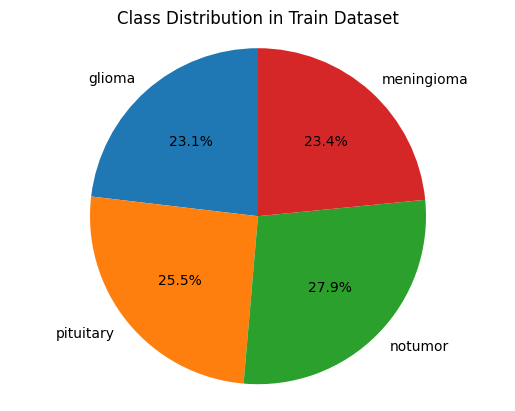

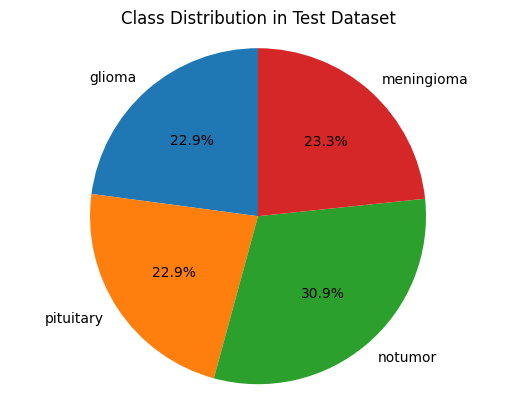

In [ ]:
fig, ax = plt.subplots()
ax.pie(train_class_counts, labels=train_class_names, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Class Distribution in Train Dataset')
plt.show()
fig, ax = plt.subplots()
ax.pie(test_class_counts, labels=test_class_names, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Class Distribution in Test Dataset')
plt.show()

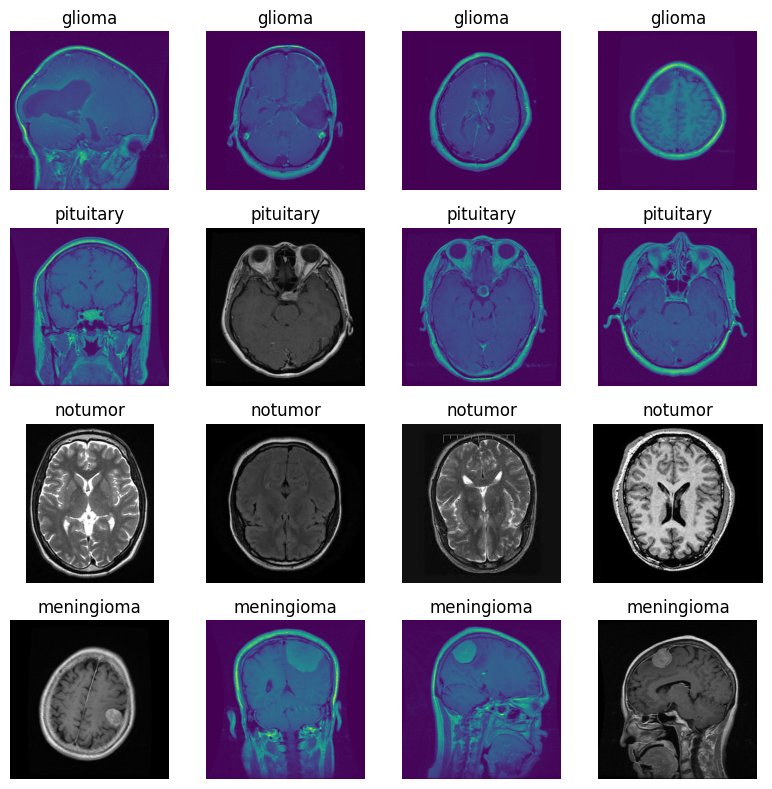

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_random_images(target_dir, num_images_per_class=4, img_size=(8, 8)):
    classes = os.listdir(target_dir)
    plt.figure(figsize=img_size)

    for i, target_class in enumerate(classes):
        target_folder = os.path.join(target_dir, target_class)
        random_images = random.sample(os.listdir(target_folder), num_images_per_class)

        for j, random_image in enumerate(random_images):
            img_path = os.path.join(target_folder, random_image)
            img = mpimg.imread(img_path)

            plt.subplot(len(classes), num_images_per_class, i * num_images_per_class + j + 1)
            plt.imshow(img)
            plt.title(target_class)
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage:
train_dir = "/content/classification/Training"

# Plot 4 random images for each class
plot_random_images(train_dir, num_images_per_class=4)


Image shape: (605, 600, 3)


(605, 600, 3)

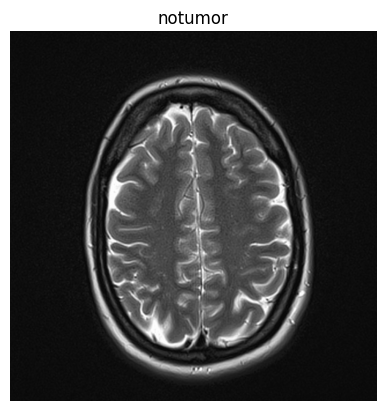

In [ ]:

def view_random_image(target_dir, target_class):
  target_folder = target_dir + '/' + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))
img
img.shape

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2  # Use ResNet50V2 instead of ResNet101
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import keras.backend as K
# Path to the dataset (adjust paths according to your directory structure)
train_dir = "/content/classification/Training"
val_dir = "/content/classification/Testing"

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input,  # Preprocess for ResNet50V2
    rotation_range=20,     # Data augmentation: rotate images
    width_shift_range=0.2, # Data augmentation: horizontal shift
    height_shift_range=0.2,# Data augmentation: vertical shift
    shear_range=0.2,       # Data augmentation: shear images
    zoom_range=0.2,        # Data augmentation: zoom images
    horizontal_flip=True,  # Data augmentation: flip images horizontally
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input  # Preprocess for ResNet50V2
)  # Only rescaling for validation data

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2  # Use ResNet50V2 instead of ResNet101
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import keras.backend as K

# Load the ResNet50V2 base model with ImageNet weights
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modify the classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
output = Dense(4, activation='softmax')(x)  # Assuming 4 classes for classification

# Build the model
classification_model = Model(inputs=base_model.input, outputs=output)

# Unfreeze all layers in the base model except for the last 5
for layer in base_model.layers[:-5]:
    layer.trainable = False

# Show model summary
classification_model.summary()

# Create metric instances outside the function
precision_metric = Precision()
recall_metric = Recall()

# Define F1-score
def f1_score(y_true, y_pred):
    # Calculate precision and recall using the metric instances
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)

    # Compute F1 score
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# Set up TensorBoard log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Number of training images
num_train_images = train_generator.samples
num_val_images = val_generator.samples

# Calculate the correct steps_per_epoch and validation_steps
steps_per_epoch = num_train_images // train_generator.batch_size
validation_steps = num_val_images // val_generator.batch_size

# Adjust the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Lower the learning rate

# Reduce learning rate when a metric has stopped improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
classification_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', precision_metric, recall_metric, f1_score]
)

# Combine all callbacks
callbacks = [tensorboard_callback, early_stopping, lr_scheduler]



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,572,996 (44.96 MB)

 Trainable params: 1,062,916 (2.03 MB)

 Non-trainable params: 22,510,080 (42.93 MB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 

In [ ]:
# Start training
classification_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=50,
    callbacks=callbacks
)


In [ ]:
import matplotlib.pyplot as plt

# Access training metrics
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Access precision and recall metrics using the correct names
precision = history.history['precision_4']  # Correct precision key
val_precision = history.history['val_precision_4']  # Correct validation precision key
recall = history.history['recall_4']  # Correct recall key
val_recall = history.history['val_recall_4']  # Correct validation recall key

# Number of epochs
epochs = range(1, len(accuracy) + 1)

# Plotting Accuracy and Loss
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Precision
plt.subplot(2, 2, 3)
plt.plot(epochs, precision, label='Training Precision', color='blue')
plt.plot(epochs, val_precision, label='Validation Precision', color='orange')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Plotting Recall
plt.subplot(2, 2, 4)
plt.plot(epochs, recall, label='Training Recall', color='blue')
plt.plot(epochs, val_recall, label='Validation Recall', color='orange')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'history' is not defined

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision_4', 'recall_4', 'val_accuracy', 'val_loss', 'val_precision_4', 'val_recall_4', 'learning_rate'])


In [ ]:
import nibabel as nib
import os

# Function to load NIfTI files for a single patient
def load_nifti_file(filepath):
    """Loads a NIfTI file and returns the image data."""
    img = nib.load(filepath)
    img_data = img.get_fdata()
    return img_data

# Function to load all modalities for a patient
def load_patient_data(patient_folder):
    # Modalities in BraTS dataset (adjusted to use .nii.gz extension)
    modalities = {
        'flair': '_flair.nii',
        't1': '_t1.nii',
        't1ce': '_t1ce.nii',
        't2': '_t2.nii',
        'seg': '_seg.nii'
    }

    data = {}

    # Load all modalities for the patient
    for modality, suffix in modalities.items():
        modality_file = os.path.join(patient_folder, f"{os.path.basename(patient_folder)}{suffix}")
        if os.path.exists(modality_file):
            print(f"Loading {modality} from {modality_file}")
            data[modality] = load_nifti_file(modality_file)
        else:
            print(f"Warning: {modality_file} not found for modality: {modality}")

    return data

# Path to the patient folder
patient_folder = '/content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001'

# Load the data for this patient
example_patient_data = load_patient_data(patient_folder)

# Check which modalities were loaded
print(f"Available modalities in example_patient_data: {example_patient_data.keys()}")


Loading flair from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii
Loading t1 from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii
Loading t1ce from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii
Loading t2 from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii
Loading seg from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii
Available modalities in example_patient_data: dict_keys(['flair', 't1', 't1ce', 't2', 'seg'])


In [ ]:
import os

# Set the path to the BraTS 2020 dataset
brats_data_directory = '/content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'

# List of modalities
modalities = ['_flair.nii', '_t1.nii', '_t1ce.nii', '_t2.nii', '_seg.nii']

def count_images(directory):
    """Count the number of images in the BraTS dataset based on modalities."""
    total_images = 0
    for patient_folder in os.listdir(directory):
        patient_path = os.path.join(directory, patient_folder)
        if os.path.isdir(patient_path):
            patient_valid = True  # Flag to track if all modalities are available
            for modality in modalities:
                file_path = os.path.join(patient_path, f"{os.path.basename(patient_path)}{modality}")
                if not os.path.exists(file_path):
                    patient_valid = False
                    break  # Skip this patient if any modality is missing
            if patient_valid:
                total_images += len(modalities)  # Count all modalities for this patient
    return total_images

# Count the images
total_images = count_images(brats_data_directory)
print(f"Total number of images in the dataset: {total_images}")



Total number of images in the dataset: 1840


In [ ]:
import numpy as np
def convert_to_slices(volume, axis=2):
    """Convert 3D volume to 2D slices along a given axis (default: axial view)."""
    slices = [volume[:, :, i] for i in range(volume.shape[axis])]
    return np.array(slices)

# Example: Convert FLAIR modality to 2D slices
flair_slices = convert_to_slices(example_patient_data['flair'])

print(f"Number of 2D slices from FLAIR: {flair_slices.shape[0]}")


Number of 2D slices from FLAIR: 155


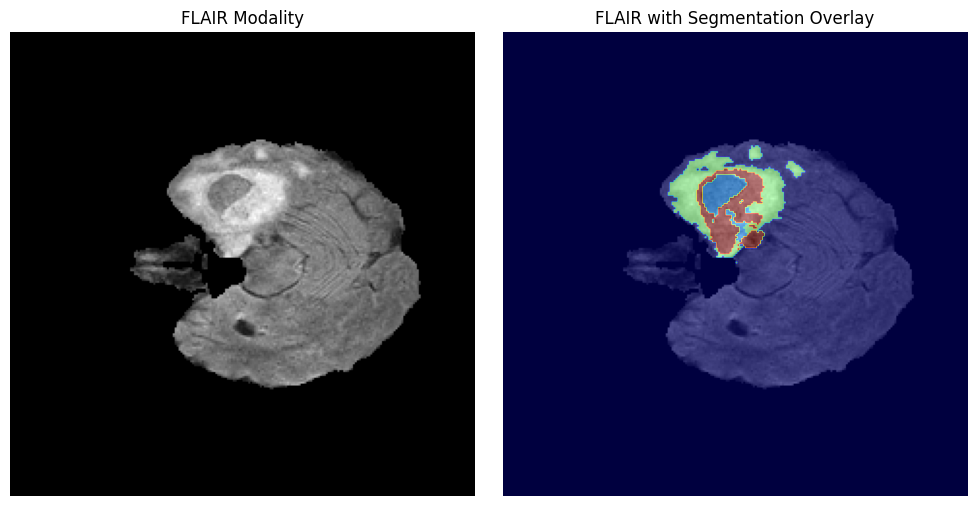

In [ ]:
import matplotlib.pyplot as plt

def plot_segmentation_with_flair(patient_data, slice_index):
    """Plot the FLAIR modality with segmentation overlay."""
    flair = patient_data['flair'][:, :, slice_index]
    seg = patient_data['seg'][:, :, slice_index]

    # Create a figure
    plt.figure(figsize=(10, 5))

    # Display FLAIR image
    plt.subplot(1, 2, 1)
    plt.imshow(flair, cmap='gray')
    plt.title('FLAIR Modality')
    plt.axis('off')

    # Display segmentation
    plt.subplot(1, 2, 2)
    plt.imshow(flair, cmap='gray')
    plt.imshow(seg, alpha=0.5, cmap='jet')  # Overlay segmentation in color
    plt.title('FLAIR with Segmentation Overlay')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
slice_index = 50
# Visualize the FLAIR modality and segmentation
plot_segmentation_with_flair(example_patient_data, slice_index)


In [ ]:
import nibabel as nib
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to load NIfTI files for a single patient
def load_nifti_file(filepath):
    """Loads a NIfTI file and returns the image data."""
    img = nib.load(filepath)
    img_data = img.get_fdata()
    return img_data

# Function to load all modalities for a patient
def load_patient_data(patient_folder):
    modalities = {
        'flair': '_flair.nii',
        't1': '_t1.nii',
        't1ce': '_t1ce.nii',
        't2': '_t2.nii',
        'seg': '_seg.nii'
    }

    data = {}
    for modality, suffix in modalities.items():
        modality_file = os.path.join(patient_folder, f"{os.path.basename(patient_folder)}{suffix}")
        if os.path.exists(modality_file):
            print(f"Loading {modality} from {modality_file}")
            data[modality] = load_nifti_file(modality_file)
        else:
            print(f"Warning: {modality_file} not found for modality: {modality}")

    return data

# Function to plot all modalities for a given slice index
def plot_modalities(patient_data, slice_index):
    modalities = ['flair', 't1', 't1ce', 't2', 'seg']

    fig, axes = plt.subplots(1, len(modalities), figsize=(20, 5))

    for ax, modality in zip(axes, modalities):
        if modality in patient_data:
            ax.imshow(patient_data[modality][:, :, slice_index], cmap='gray')
            ax.set_title(modality)
            ax.axis('off')
        else:
            ax.set_title(f"{modality} not available")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Interactive plot function
def interactive_slice_plot(patient_data):
    slice_slider = widgets.IntSlider(value=40, min=0, max=patient_data['flair'].shape[2] - 1, step=1, description='Slice Index:')

    def update(slice_index):
        plot_modalities(patient_data, slice_index)

    interactive_plot = widgets.interactive(update, slice_index=slice_slider)
    display(interactive_plot)

# Load the patient data
patient_folder = '/content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001'
example_patient_data = load_patient_data(patient_folder)

# Create an interactive plot
interactive_slice_plot(example_patient_data)


Loading flair from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii
Loading t1 from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii
Loading t1ce from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii
Loading t2 from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii
Loading seg from /content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii


interactive(children=(IntSlider(value=40, description='Slice Index:', max=154), Output()), _dom_classes=('widg…

In [ ]:
def analyze_data_shapes(patient_data):
    """Prints the shape of each modality in the patient data."""
    for modality, data in patient_data.items():
        print(f"{modality.upper()} shape: {data.shape}")

# Analyze data shapes for the available patient
analyze_data_shapes(example_patient_data)


FLAIR shape: (240, 240, 155)
T1 shape: (240, 240, 155)
T1CE shape: (240, 240, 155)
T2 shape: (240, 240, 155)
SEG shape: (240, 240, 155)


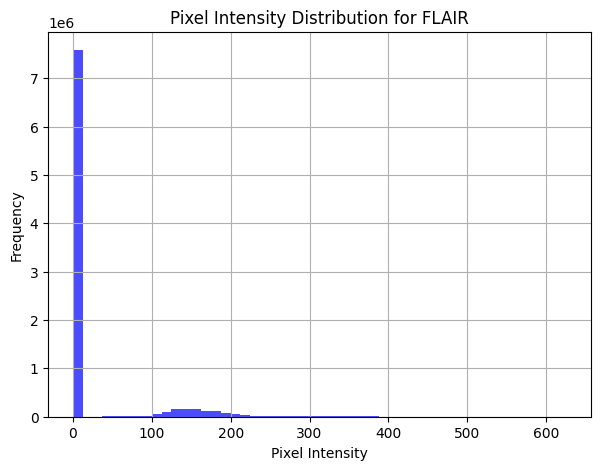

In [ ]:
def plot_pixel_intensity_distribution(patient_data, modality='flair'):
    """Plot the pixel intensity distribution for a given modality."""
    if modality not in patient_data:
        print(f"{modality.upper()} not found!")
        return

    # Flatten the 3D volume to a 1D array
    pixels = patient_data[modality].flatten()

    # Plot the histogram of pixel intensities
    plt.figure(figsize=(7, 5))
    plt.hist(pixels, bins=50, color='blue', alpha=0.7)
    plt.title(f"Pixel Intensity Distribution for {modality.upper()}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Plot intensity distribution for FLAIR modality
plot_pixel_intensity_distribution(example_patient_data, modality='flair')

# You can change 'flair' to 't1', 't1ce', 't2' to analyze other modalities.


In [ ]:
import os
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom, rotate
import tensorflow as tf
from sklearn.cluster import KMeans
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

# Set paths to your training and validation data
train_data_directory = '/content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
val_data_directory = '/content/Brats20/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

# Mixed precision training
policy = tf.keras.mixed_precision.Policy('float16')
tf.keras.mixed_precision.set_global_policy(policy)


def load_nifti_file(filepath):
    """Load a NIfTI file and return the image data as a numpy array."""
    if os.path.exists(filepath):
        img = nib.load(filepath)
        return img.get_fdata()
    else:
        print(f"File not found: {filepath}")
        return None

def normalize_image(image):
    """Normalize image intensity to the range [0, 1]."""
    if image is not None:
        image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-10)  # Added small value to avoid division by zero
    return image

def kmeans_segmentation(image, n_clusters=3):
    """Apply K-means clustering to the 4D image and return the cluster labels."""
    # Reshape image to 2D for K-means (flatten spatial dimensions)
    reshaped_image = image.reshape(-1, image.shape[-1])  # Shape: (num_voxels, num_modalities)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reshaped_image)  # Shape: (num_voxels,)

    # Reshape back to the original 3D spatial dimensions
    clustered_image = cluster_labels.reshape(image.shape[:-1])  # Shape: (height, width, depth)

    return clustered_image

def augment_data(image, mask, clustered_image):
    """Apply random augmentations: flip, rotate, zoom, and ensure output dimensions are (128, 128, 128)."""
    # Ensure the input is 4D (with cluster labels) and mask is 3D
    assert image.ndim == 4, f"Image must be 4D (including channel dimension), got {image.ndim}"
    assert mask.ndim == 3, f"Mask must be 3D, got {mask.ndim}"
    assert clustered_image.ndim == 3, f"Clustered image must be 3D, got {clustered_image.ndim}"

    # Random flip
    if np.random.rand() > 0.5:
        image = np.flip(image, axis=0)
        mask = np.flip(mask, axis=0)
        clustered_image = np.flip(clustered_image, axis=0)

    # Random rotate
    if np.random.rand() > 0.5:
        angle = np.random.uniform(-10, 10)
        image = rotate(image, angle, axes=(1, 2), reshape=False)
        mask = rotate(mask, angle, axes=(1, 2), reshape=False)
        clustered_image = rotate(clustered_image, angle, axes=(1, 2), reshape=False)

    # Random zoom
    if np.random.rand() > 0.5:
        zoom_factor = np.random.uniform(0.9, 1.1)
        image = zoom(image, zoom_factor)
        mask = zoom(mask, zoom_factor)
        clustered_image = zoom(clustered_image, zoom_factor)

    # Resize to ensure output dimensions are (128, 128, 128)
    target_shape = (128, 128, 128)

    # Resize image to target shape
    image_resized = zoom(image,
                         (target_shape[0] / image.shape[0],
                          target_shape[1] / image.shape[1],
                          target_shape[2] / image.shape[2],
                          1),  # Keep the channel dimension unchanged
                         order=1)

    # Resize mask to target shape
    mask_resized = zoom(mask,
                        (target_shape[0] / mask.shape[0],
                         target_shape[1] / mask.shape[1],
                         target_shape[2] / mask.shape[2]), order=0)  # Nearest neighbor for masks

    # Resize clustered image (K-means output) to target shape
    clustered_resized = zoom(clustered_image,
                             (target_shape[0] / clustered_image.shape[0],
                              target_shape[1] / clustered_image.shape[1],
                              target_shape[2] / clustered_image.shape[2]), order=0)  # Nearest neighbor for labels

    return image_resized, mask_resized, clustered_resized

def data_generator(directory, batch_size=1, target_shape=(128, 128, 128), n_clusters=3):
    """Yield batches of augmented MRI scans and corresponding masks, including K-means cluster labels."""
    while True:
        images = []
        masks = []
        clustered_images = []
        for patient_folder in os.listdir(directory):
            patient_path = os.path.join(directory, patient_folder)
            if os.path.isdir(patient_path):
                flair = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_flair.nii"))
                t1 = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_t1.nii"))
                t1ce = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_t1ce.nii"))
                t2 = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_t2.nii"))
                mask = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_seg.nii"))

                if flair is None or t1 is None or t1ce is None or t2 is None or mask is None:
                    continue

                flair = normalize_image(flair)
                t1 = normalize_image(t1)
                t1ce = normalize_image(t1ce)
                t2 = normalize_image(t2)

                flair_resized = zoom(flair, [target_shape[0] / flair.shape[0],
                                             target_shape[1] / flair.shape[1],
                                             target_shape[2] / flair.shape[2]], order=1)
                t1_resized = zoom(t1, [target_shape[0] / t1.shape[0],
                                       target_shape[1] / t1.shape[1],
                                       target_shape[2] / t1.shape[2]], order=1)
                t1ce_resized = zoom(t1ce, [target_shape[0] / t1ce.shape[0],
                                           target_shape[1] / t1ce.shape[1],
                                           target_shape[2] / t1ce.shape[2]], order=1)
                t2_resized = zoom(t2, [target_shape[0] / t2.shape[0],
                                       target_shape[1] / t2.shape[1],
                                       target_shape[2] / t2.shape[2]], order=1)
                mask_resized = zoom(mask, [target_shape[0] / mask.shape[0],
                                           target_shape[1] / mask.shape[1],
                                           target_shape[2] / mask.shape[2]], order=0)

                stacked_image = np.stack([flair_resized, t1_resized, t1ce_resized, t2_resized], axis=-1)

                clustered_image = kmeans_segmentation(stacked_image, n_clusters=n_clusters)

                image, mask_resized, clustered_resized = augment_data(stacked_image, mask_resized, clustered_image)

                images.append(np.expand_dims(image, axis=0))
                masks.append(np.expand_dims(mask_resized, axis=(0, -1)))
                clustered_images.append(np.expand_dims(clustered_resized, axis=(0, -1)))

                if len(images) == batch_size:
                    yield (np.concatenate(images, axis=0),
                           np.concatenate(masks, axis=0),
                           np.concatenate(clustered_images, axis=0))
                    images, masks, clustered_images = [], [], []

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, Activation, MaxPooling3D, UpSampling3D, concatenate, Add
from tensorflow.keras.layers import GlobalAveragePooling3D, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

# Attention block to focus on important features
class AttentionBlock(tf.keras.layers.Layer):
    def __init__(self, channels):
        super(AttentionBlock, self).__init__()
        self.channels = channels
        self.query = Conv3D(channels, (1, 1, 1), padding='same', activation='sigmoid')
        self.key = Conv3D(channels, (1, 1, 1), padding='same', activation='sigmoid')
        self.value = Conv3D(channels, (1, 1, 1), padding='same')

    def call(self, inputs):
        query = self.query(inputs)
        key = self.key(inputs)
        value = self.value(inputs)

        attention = query * key
        attention = attention * value
        return attention

# Custom Residual Block
def residual_block(input_tensor, num_filters):
    x = Conv3D(num_filters, (3, 3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv3D(num_filters, (3, 3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    skip = Conv3D(num_filters, (1, 1, 1))(input_tensor)
    x = Add()([x, skip])  # Residual connection
    return x

# Custom U-Net with attention and residual blocks
def custom_unet(input_shape=(128, 128, 128, 4)):  # 4 input channels for the 4 modalities
    inputs = Input(input_shape)

    # Encoder - Downsampling path (reduced filters)
    conv1 = residual_block(inputs, 16)  # Reduced from 32 to 16 filters
    pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)

    conv2 = residual_block(pool1, 32)  # Reduced from 64 to 32 filters
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)

    conv3 = residual_block(pool2, 64)  # Reduced from 128 to 64 filters
    pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)

    conv4 = residual_block(pool3, 128)  # Reduced from 256 to 128 filters

    # Attention mechanism
    attention1 = AttentionBlock(64)(conv3)  # Adjusted filter size for attention blocks
    attention2 = AttentionBlock(32)(conv2)

    # Decoder - Upsampling path
    up1 = UpSampling3D(size=(2, 2, 2))(conv4)
    concat1 = concatenate([up1, attention1])
    conv5 = residual_block(concat1, 64)  # Reduced from 256 to 64 filters

    up2 = UpSampling3D(size=(2, 2, 2))(conv5)
    concat2 = concatenate([up2, attention2])
    conv6 = residual_block(concat2, 32)  # Reduced from 128 to 32 filters

    up3 = UpSampling3D(size=(2, 2, 2))(conv6)
    concat3 = concatenate([up3, conv1])
    conv7 = residual_block(concat3, 16)  # Reduced from 64 to 16 filters

    # Output layer with sigmoid activation for binary segmentation

    outputs = Conv3D(1, (1, 1, 1), activation='sigmoid', padding='same')(conv7)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Initialize and compile the model
model = custom_unet(input_shape=(128, 128, 128, 4))  # 4 input channels for 4 modalities
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',  # Binary segmentation loss
              metrics=['accuracy'])

# Callbacks for Training
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),
    TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)
]



# Model summary
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 128, 128, 128,  │              0 │ -                      │
│ (InputLayer)              │ 4)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_84 (Conv3D)        │ (None, 128, 128, 128,  │          1,744 │ input_layer_4[0][0]    │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_28    │ (None, 128, 128, 128,  │             64 │ conv3d_84[0][0]        │
│ (BatchNormalization)      │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_28             │ (None, 128, 128, 128,  │              0 │ batch_normalization_2… │
│ (Activation)              │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_85 (Conv3D)        │ (None, 128, 128, 128,  │          6,928 │ activation_28[0][0]    │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_29    │ (None, 128, 128, 128,  │             64 │ conv3d_85[0][0]        │
│ (BatchNormalization)      │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_29             │ (None, 128, 128, 128,  │              0 │ batch_normalization_2… │
│ (Activation)              │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_86 (Conv3D)        │ (None, 128, 128, 128,  │             80 │ input_layer_4[0][0]    │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_20 (Add)              │ (None, 128, 128, 128,  │              0 │ activation_29[0][0],   │
│                           │ 16)                    │                │ conv3d_86[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_6           │ (None, 64, 64, 64, 16) │              0 │ add_20[0][0]           │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_87 (Conv3D)        │ (None, 64, 64, 64, 32) │         13,856 │ max_pooling3d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_30    │ (None, 64, 64, 64, 32) │            128 │ conv3d_87[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_30             │ (None, 64, 64, 64, 32) │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_88 (Conv3D)   

 Total params: 1,506,641 (2.87 MB)

 Trainable params: 1,505,233 (2.87 MB)

 Non-trainable params: 1,408 (2.75 KB)

In [ ]:

# Train the model using data generators
train_gen = data_generator(train_data_directory, batch_size=2)
val_gen = data_generator(val_data_directory, batch_size=2)

# Calculate the steps per epoch for training and validation
train_steps = len(train_data_directory) // 2  # Divide total training samples by batch size
val_steps = len(val_data_directory) // 2      # Divide total validation samples by batch size

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=100,
    steps_per_epoch=train_steps,  # Specify steps per epoch for training
    validation_steps=val_steps,   # Specify steps per epoch for validation
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100


InvalidArgumentError: No OpKernel was registered to support Op 'MaxPool3D' used by {{node StatefulPartitionedCall/functional_4_1/max_pooling3d_6_1/MaxPool3D}} with these attrs: [padding="VALID", data_format="NDHWC", strides=[1, 2, 2, 2, 1], ksize=[1, 2, 2, 2, 1], T=DT_HALF]
Registered devices: [CPU]
Registered kernels:
  device='XLA_GPU_JIT'; T in [DT_FLOAT, DT_BFLOAT16, DT_HALF]
  device='GPU'; T in [DT_BFLOAT16]
  device='GPU'; T in [DT_HALF]
  device='GPU'; T in [DT_FLOAT]
  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_BFLOAT16, DT_HALF]
  device='CPU'; T in [DT_BFLOAT16]
  device='CPU'; T in [DT_FLOAT]

	 [[StatefulPartitionedCall/functional_4_1/max_pooling3d_6_1/MaxPool3D]] [Op:__inference_one_step_on_iterator_21057]

In [ ]:
import os

# Set paths to your training and validation data
train_data_directory = '/content/Brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
val_data_directory = '/content/Brats20/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

# Get the number of training and validation samples
train_samples = len([name for name in os.listdir(train_data_directory) if os.path.isdir(os.path.join(train_data_directory, name))])
val_samples = len([name for name in os.listdir(val_data_directory) if os.path.isdir(os.path.join(val_data_directory, name))])

# Set batch size
batch_size = 4

# Calculate steps per epoch and validation steps
steps_per_epoch = train_samples // batch_size
validation_steps = val_samples // batch_size

# Print the results
print(f"Number of training samples: {train_samples}")
print(f"Number of validation samples: {val_samples}")
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")


Number of training samples: 369
Number of validation samples: 125
Steps per epoch: 92
Validation steps: 31


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2  # Use ResNet50V2 instead of ResNet101
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import Sequence
import datetime
import keras.backend as K
import nibabel as nib
from scipy.ndimage import zoom, rotate
from sklearn.cluster import KMeans

# Data Generator for 3D MRI segmentation (K-means clustering)
def data_generator(directory, batch_size=1, target_shape=(128, 128, 128), n_clusters=3):
    while True:
        images = []
        masks = []
        clustered_images = []
        for patient_folder in os.listdir(directory):
            patient_path = os.path.join(directory, patient_folder)
            if os.path.isdir(patient_path):
                flair = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_flair.nii"))
                t1 = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_t1.nii"))
                t1ce = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_t1ce.nii"))
                t2 = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_t2.nii"))
                mask = load_nifti_file(os.path.join(patient_path, f"{os.path.basename(patient_path)}_seg.nii"))

                if flair is None or t1 is None or t1ce is None or t2 is None or mask is None:
                    continue

                flair = normalize_image(flair)
                t1 = normalize_image(t1)
                t1ce = normalize_image(t1ce)
                t2 = normalize_image(t2)

                flair_resized = zoom(flair, [target_shape[0] / flair.shape[0],
                                             target_shape[1] / flair.shape[1],
                                             target_shape[2] / flair.shape[2]], order=1)
                t1_resized = zoom(t1, [target_shape[0] / t1.shape[0],
                                       target_shape[1] / t1.shape[1],
                                       target_shape[2] / t1.shape[2]], order=1)
                t1ce_resized = zoom(t1ce, [target_shape[0] / t1ce.shape[0],
                                           target_shape[1] / t1ce.shape[1],
                                           target_shape[2] / t1ce.shape[2]], order=1)
                t2_resized = zoom(t2, [target_shape[0] / t2.shape[0],
                                       target_shape[1] / t2.shape[1],
                                       target_shape[2] / t2.shape[2]], order=1)
                mask_resized = zoom(mask, [target_shape[0] / mask.shape[0],
                                           target_shape[1] / mask.shape[1],
                                           target_shape[2] / mask.shape[2]], order=0)

                stacked_image = np.stack([flair_resized, t1_resized, t1ce_resized, t2_resized], axis=-1)

                clustered_image = kmeans_segmentation(stacked_image, n_clusters=n_clusters)

                image, mask_resized, clustered_resized = augment_data(stacked_image, mask_resized, clustered_image)

                images.append(np.expand_dims(image, axis=0))
                masks.append(np.expand_dims(mask_resized, axis=(0, -1)))
                clustered_images.append(np.expand_dims(clustered_resized, axis=(0, -1)))

                if len(images) == batch_size:
                    yield (np.concatenate(images, axis=0),
                           np.concatenate(masks, axis=0),
                           np.concatenate(clustered_images, axis=0))
                    images, masks, clustered_images = [], [], []


# Hybrid Generator that combines segmentation and classification data
class HybridDataGenerator(Sequence):
    def __init__(self, classification_dir, segmentation_dir, batch_size=32, target_shape_classification=(224, 224), target_shape_segmentation=(128, 128, 128), n_clusters=3):
        self.classification_generator = ImageDataGenerator(
            preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True
        ).flow_from_directory(classification_dir, target_size=target_shape_classification, batch_size=batch_size, class_mode='categorical')

        self.segmentation_generator = data_generator(segmentation_dir, batch_size=batch_size, target_shape=target_shape_segmentation, n_clusters=n_clusters)
        self.batch_size = batch_size

    def __len__(self):
        return min(len(self.classification_generator), len(self.segmentation_generator))

    def __getitem__(self, idx):
        classification_data = self.classification_generator[idx]
        segmentation_data = next(self.segmentation_generator)

        x_classification, y_classification = classification_data
        x_segmentation, y_segmentation, _ = segmentation_data

        return [x_classification, x_segmentation], [y_classification, y_segmentation]

    def on_epoch_end(self):
        self.classification_generator.on_epoch_end()
        # Segmentation generator is infinite, no need to reset it


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Conv3D, BatchNormalization, Activation, MaxPooling3D, UpSampling3D, concatenate, Add
from tensorflow.keras.models import Model

# Load your pre-trained classification model
classification_model = tf.keras.models.load_model('path_to_your_classification_model.h5')

# Load your pre-trained segmentation model
segmentation_model = tf.keras.models.load_model('path_to_your_segmentation_model.h5')

# Shared Encoder from Classification Model (ResNet)
def shared_encoder_from_classification_model():
    base_model = classification_model.get_layer(index=0)  # Assuming ResNet is the first part of the model
    for layer in base_model.layers:
        layer.trainable = True  # Set layers trainable (optional: could freeze layers if needed)
    return base_model

# Classification Head (from pre-trained classification model)
def classification_head_from_pretrained_model(encoder_output):
    # Extract the classification layers from the pre-trained model
    x = GlobalAveragePooling2D()(encoder_output)
    x = Dropout(0.5)(x)
    classification_output = Dense(4, activation='softmax')(x)
    return classification_output

# Segmentation Head (from pre-trained segmentation model)
def segmentation_head_from_pretrained_model(encoder_output, input_shape=(128, 128, 128, 4)):
    # Custom Residual Block (from your segmentation model)
    def residual_block(input_tensor, num_filters):
        x = Conv3D(num_filters, (3, 3, 3), padding='same')(input_tensor)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv3D(num_filters, (3, 3, 3), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        skip = Conv3D(num_filters, (1, 1, 1))(input_tensor)
        x = Add()([x, skip])
        return x

    # Decoder part (from the pre-trained segmentation model)
    conv1 = segmentation_model.get_layer('conv1')(encoder_output)
    pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)

    conv2 = segmentation_model.get_layer('conv2')(pool1)
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)

    conv3 = segmentation_model.get_layer('conv3')(pool2)
    pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)

    conv4 = segmentation_model.get_layer('conv4')(pool3)

    # Decoder
    up1 = UpSampling3D(size=(2, 2, 2))(conv4)
    concat1 = concatenate([up1, conv3])
    conv5 = residual_block(concat1, 64)

    up2 = UpSampling3D(size=(2, 2, 2))(conv5)
    concat2 = concatenate([up2, conv2])
    conv6 = residual_block(concat2, 32)

    up3 = UpSampling3D(size=(2, 2, 2))(conv6)
    concat3 = concatenate([up3, conv1])
    conv7 = residual_block(concat3, 16)

    # Segmentation Output
    segmentation_output = Conv3D(1, (1, 1, 1), activation='sigmoid', padding='same')(conv7)

    return segmentation_output

# Build the hybrid model
def hybrid_model_from_pretrained(input_shape_classification=(224, 224, 3), input_shape_segmentation=(128, 128, 128, 4), num_classes=4):
    # Input for classification task
    input_classification = Input(shape=input_shape_classification)

    # Shared encoder using the pre-trained classification model's encoder
    shared_encoder = shared_encoder_from_classification_model()
    encoder_output = shared_encoder(input_classification)

    # Classification head (from the pre-trained classification model)
    classification_output = classification_head_from_pretrained_model(encoder_output)

    # Input for segmentation task
    input_segmentation = Input(shape=input_shape_segmentation)

    # Segmentation head (from the pre-trained segmentation model)
    segmentation_output = segmentation_head_from_pretrained_model(input_segmentation)

    # Define the hybrid model with two inputs and two outputs
    model = Model(inputs=[input_classification, input_segmentation],
                  outputs=[classification_output, segmentation_output])

    return model

# Instantiate the hybrid model
hybrid_model = hybrid_model_from_pretrained()

# Compile the hybrid model
hybrid_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss={'dense': 'categorical_crossentropy', 'conv3d_4': 'binary_crossentropy'},  # Adjust layer names accordingly
    metrics={'dense': 'accuracy', 'conv3d_4': 'accuracy'}
)

# Model summary
hybrid_model.summary()


In [ ]:
# Assuming you have already split your classification and segmentation datasets
train_classification_data = [...]  # Classification dataset (images, labels)
train_segmentation_data = [...]  # Segmentation dataset (images, masks)

# Define the multi-task data generator
train_generator = multi_task_data_generator(train_classification_data, train_segmentation_data, batch_size=32)

# Train the multi-task model
history = multi_task_model.fit(
    train_generator,
    steps_per_epoch=len(train_classification_data) // 32,
    epochs=10,  # Adjust based on your dataset
)
